## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

## Data

In [2]:
# https://keras.io/api/datasets/cifar10/
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert Y_train.shape == (50000, 1)
assert Y_test.shape == (10000, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0
labels = {0 : "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
          5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

[3] cat


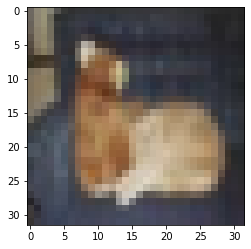

In [3]:
idx = 17
print(Y_train[idx], labels[Y_train[idx][0]])
plt.imshow(X_train[idx])

## Model

In [5]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomContrast(0.5)
])
data_augmentation.build(input_shape=(1, 32, 32, 3))
model = tf.keras.models.Sequential([
    
    data_augmentation,
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(input_shape=(32,32,3),
                    filters=32,
                    kernel_size=3,
                    padding='same'),
    tf.keras.layers.Conv2D(
                    filters=32,
                    kernel_size=3,
                    padding='same'),
    tf.keras.layers.Conv2D(
                    filters=32,
                    kernel_size=3,
                    padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(
                    filters=64,
                    kernel_size=3,
                    padding='same'),
    tf.keras.layers.Conv2D(
                    filters=64,
                    kernel_size=3,
                    padding='same'),
    tf.keras.layers.Conv2D(
                    filters=64,
                    kernel_size=3,
                    padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Train

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.1,
                    epochs=100,
                    batch_size=2048,
                    verbose=0)

2022-12-08 19:32:16.865322: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.


## Results

313/313 - 1s - loss: 0.6367 - accuracy: 0.8022 - 925ms/epoch - 3ms/step


<AxesSubplot:>

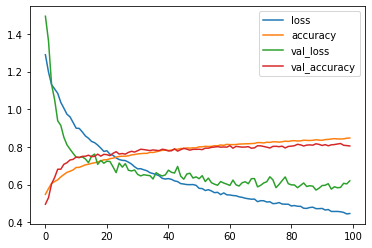

In [10]:
model.evaluate(X_test,  Y_test, verbose=2)
pd.DataFrame(history.history).plot()

In [11]:
preds = model.predict(X_test)
preds = [np.argmax(pred) for pred in preds]

8
ship


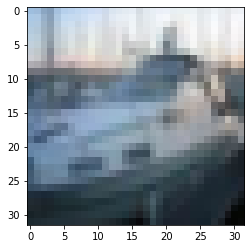

In [12]:
idx = 2
print(preds[idx])
print(labels[preds[idx]])
plt.imshow(X_test[idx])

## Visualize Augmentation

Text(0.5, 1.0, 'Augmented')

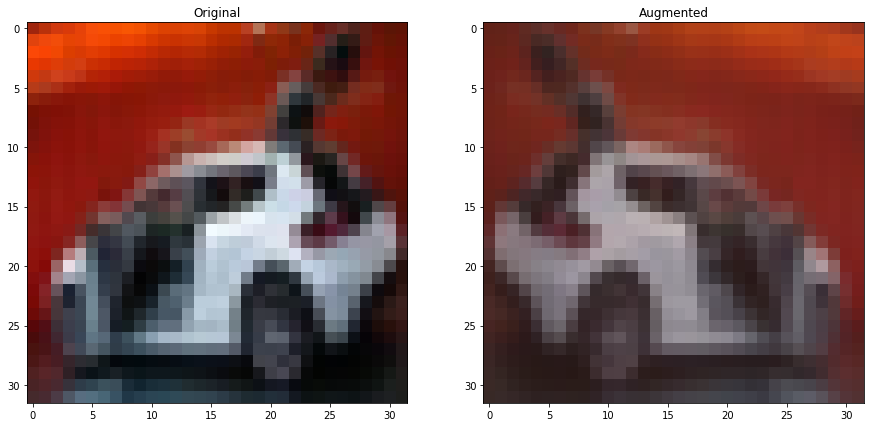

In [14]:
idx = 6
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomContrast(0.5)
])

augmented = data_augmentation(X_test[idx], training=True)
f, axarr = plt.subplots(1, 2, figsize=(15, 15))
axarr[0].imshow(X_test[idx])
axarr[0].set_title('Original')
axarr[1].imshow(augmented)
axarr[1].set_title('Augmented')